In [1]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [2]:
pwd = os.getcwd()
path2dat = pwd + '/nTMDs/plots/'
datalst = os.listdir(path2dat+'data_reps/data_rep_000/')

In [3]:
PDF_X00_LOWQ2 = "fort.1"
PDF_X00_HIGHQ2 = "fort.2"

In [4]:
FF_X00_LOWQ2 = "fort.11"
FF_X00_HIGHQ2 = "fort.22"

In [5]:
PDF_KT00_LOWQ2 = "fort.1000"
PDF_KT00_HIGHQ2 = "fort.2000"

In [6]:
FF_PT00_LOWQ2 = "fort.10000"
FF_PT00_HIGHQ2 = "fort.20000"

In [7]:
PDF_X02_LOWQ2 = "fort.101"
PDF_X02_HIGHQ2 = "fort.102"

In [8]:
FF_X03_LOWQ2= "fort.201"
FF_X03_HIGHQ2 = "fort.202"

In [9]:
PDF_X04_LOWQ2 = "fort.301"
PDF_X04_HIGHQ2 = "fort.302"

In [10]:
FF_X05_LOWQ2= "fort.401"
FF_X05_HIGHQ2 = "fort.402"

In [11]:
PDF_X06_LOWQ2 = "fort.501"
PDF_X06_HIGHQ2 = "fort.502"

In [12]:
FF_X07_LOWQ2= "fort.601"
FF_X07_HIGHQ2 = "fort.602"

In [13]:
TMDdatalst = [PDF_X00_LOWQ2,  PDF_X00_HIGHQ2,
              FF_X00_LOWQ2,   FF_X00_HIGHQ2,
              PDF_KT00_LOWQ2, PDF_KT00_HIGHQ2,
              FF_PT00_LOWQ2,  FF_PT00_HIGHQ2,
              PDF_X02_LOWQ2,  PDF_X02_HIGHQ2, 
              FF_X03_LOWQ2,   FF_X03_HIGHQ2, 
              PDF_X04_LOWQ2,  PDF_X04_HIGHQ2,
              FF_X05_LOWQ2, FF_X05_HIGHQ2, 
              PDF_X06_LOWQ2, PDF_X06_HIGHQ2, 
              FF_X07_LOWQ2, FF_X07_HIGHQ2]

In [14]:
up = "up"
u1 = "u1"
u2 = "u2"
ubp = "dp"
ub1 = "d1"
ub2 = "d2"

In [15]:
maxlib = {}
minlib = {}
for _fp in TMDdatalst:
    print(_fp)
    maxlib[_fp] = {}
    minlib[_fp] = {}
    maxlib[_fp][up] = []
    minlib[_fp][up] = []
    maxlib[_fp][u1] = []
    minlib[_fp][u1] = []
    maxlib[_fp][u2] = []
    minlib[_fp][u2] = []
    maxlib[_fp][ubp] = []
    minlib[_fp][ubp] = []
    maxlib[_fp][ub1] = []
    minlib[_fp][ub1] = []
    maxlib[_fp][ub2] = []
    minlib[_fp][ub2] = []
    for j in range(len(pd.read_csv(path2dat+'/data_reps/data_rep_000/'+_fp, delimiter = ',',delim_whitespace=True))):
        for rep in range(101):
            rep = int(rep)
            if rep == 0:
                fp0 = path2dat+'/data_reps/data_rep_000/'+_fp
                df = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)[j:j+1]
            else:
                if len(str(rep)) == 1:
                    numb = '00'+str(rep)
                elif len(str(rep)) == 2:
                    numb = '0'+str(rep)
                else:
                    numb = str(rep)
                fp1 = path2dat+'/data_reps/data_rep_'+numb+'/'+_fp
                df1 = pd.read_csv(fp1, delimiter = ',',delim_whitespace=True)[j:j+1]
                df = pd.concat([df,df1])
        # u quark from proton
        sortedlst = sorted(df['up'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][up].append(mean+std)
        minlib[_fp][up].append(mean-std)
        # u quark from light nucleus (He)
        sortedlst = sorted(df['u1'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][u1].append(mean+std)
        minlib[_fp][u1].append(mean-std)
        # u quark from heavy nucleus (Xe)
        sortedlst = sorted(df['u2'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][u2].append(mean+std)
        minlib[_fp][u2].append(mean-std)
        sortedlst = sorted(df['dp'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][ubp].append(mean+std)
        minlib[_fp][ubp].append(mean-std)
        # u quark from light nucleus (He)
        sortedlst = sorted(df['d1'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][ub1].append(mean+std)
        minlib[_fp][ub1].append(mean-std)
        # u quark from heavy nucleus (Xe)
        sortedlst = sorted(df['d2'].tolist())
        mean = np.mean(sortedlst)
        std = np.std(sortedlst)
        maxlib[_fp][ub2].append(mean+std)
        minlib[_fp][ub2].append(mean-std)

fort.1
fort.2
fort.11
fort.22
fort.1000
fort.2000
fort.10000
fort.20000
fort.101
fort.102
fort.201
fort.202
fort.301
fort.302
fort.401
fort.402
fort.501
fort.502
fort.601
fort.602


In [16]:
print('Done!')

Done!


In [17]:
path2dat2 = pwd + '/nTMDs/collinear/plots'
datalst2 = os.listdir(path2dat2+ '/' + 'data_reps/data_rep_000/')

In [18]:
path2dat31 = pwd + '/nTMDs/collinear-FF1/plots'
path2dat32 = pwd + '/nTMDs/collinear-FF2/plots'
path2dat33 = pwd + '/nTMDs/collinear-FF3/plots'
datalst3 = os.listdir(path2dat2+ '/' + 'data_reps/data_rep_000/')

In [19]:
TMDdatalst2 = [PDF_X00_LOWQ2,  PDF_X00_HIGHQ2,
              PDF_KT00_LOWQ2, PDF_KT00_HIGHQ2,
              PDF_X02_LOWQ2,  PDF_X02_HIGHQ2, 
              PDF_X04_LOWQ2,  PDF_X04_HIGHQ2,
              PDF_X06_LOWQ2, PDF_X06_HIGHQ2]

In [20]:
TMDdatalst3 = [FF_X00_LOWQ2,  FF_X00_HIGHQ2,
              FF_PT00_LOWQ2,  FF_PT00_HIGHQ2,
              FF_X03_LOWQ2,   FF_X03_HIGHQ2, 
              FF_X05_LOWQ2,   FF_X05_HIGHQ2, 
              FF_X07_LOWQ2,   FF_X07_HIGHQ2]

In [21]:
errsq = {}
for _fp in TMDdatalst2:
    fp0 = path2dat2+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    errsq[_fp] = {}
    errsq[_fp][u1] = []
    errsq[_fp][u2] = [] 
    for i in range(len(df0)):
        errsq[_fp][u1].append(0)
        errsq[_fp][u2].append(0)
    for i in range(48):
        j = 2*(i+1)
        Splus = j
        Sminus = j-1
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        fpp = path2dat2+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp = pd.read_csv(fpp, delimiter = ',',delim_whitespace=True)
        fpm = path2dat2+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm = pd.read_csv(fpm, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp)):
                errp = np.abs(dfp['u1'][k]/dfp['up'][k] -df0['u1'][k]/df0['up'][k])
                errm = np.abs(dfm['u1'][k]/dfm['up'][k] -df0['u1'][k]/df0['up'][k])
                maxx = np.max([errp,errm])
                errsq[_fp][u1][k] = errsq[_fp][u1][k] + (maxx)**2
                errp = np.abs(dfp['u2'][k]/dfp['up'][k] -df0['u2'][k]/df0['up'][k])
                errm = np.abs(dfm['u2'][k]/dfm['up'][k] -df0['u2'][k]/df0['up'][k])
                maxx = np.max([errp,errm])
                errsq[_fp][u2][k] = errsq[_fp][u2][k] + (maxx)**2
for _fp in TMDdatalst3:
    fp01 = path2dat31+'/data_reps/data_rep_000/'+ _fp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat32+'/data_reps/data_rep_000/'+ _fp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    errsq[_fp] = {}
    errsq[_fp][u1] = []
    errsq[_fp][u2] = [] 
    for i in range(len(df01)):
        errsq[_fp][u1].append(0)
        errsq[_fp][u2].append(0)
    for i in range(7):
        j = i+1
        Splus = j
        Sminus = 7+j
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        #nucleus 1
        fpp1 = path2dat31+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp1 = pd.read_csv(fpp1, delimiter = ',',delim_whitespace=True)
        fpm1 = path2dat31+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm1 = pd.read_csv(fpm1, delimiter = ',',delim_whitespace=True)
        #nucleus 2
        fpp2 = path2dat32+'/data_reps/data_rep_'+numbplus+'/'+_fp
        dfp2 = pd.read_csv(fpp2, delimiter = ',',delim_whitespace=True)
        fpm2 = path2dat32+'/data_reps/data_rep_'+numbminus+'/'+_fp
        dfm2 = pd.read_csv(fpm2, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp1)):
                errp = np.abs(dfp1['u1'][k]/dfp1['up'][k] -df01['u1'][k]/df01['up'][k])
                errm = np.abs(dfm1['u1'][k]/dfm1['up'][k] -df01['u1'][k]/df01['up'][k])
                maxx = np.max([errp,errm])
                errsq[_fp][u1][k] = errsq[_fp][u1][k] + (maxx)**2
                errp = np.abs(dfp2['u2'][k]/dfp2['up'][k] -df02['u2'][k]/df02['up'][k])
                errm = np.abs(dfm2['u2'][k]/dfm2['up'][k] -df02['u2'][k]/df02['up'][k])
                maxx = np.max([errp,errm])
                errsq[_fp][u2][k] = errsq[_fp][u2][k] + (maxx)**2


In [22]:
errsqv = {}
for _fp in TMDdatalst3:
    if(_fp == 'fort.11'):
        _fpp = 'fort.10'
    else:
        _fpp = _fp
    fp01 = path2dat33+'/data_reps/data_rep_000/'+ _fpp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat33+'/data_reps/data_rep_000/'+ _fpp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    errsqv[_fp] = {}
    errsqv[_fp][u1] = []
    errsqv[_fp][u2] = [] 
    for i in range(len(df01)):
        errsqv[_fp][u1].append(0)
        errsqv[_fp][u2].append(0)
    for i in range(28):
        j = i+1
        Splus = j
        Sminus = 28+j
        #if (_fp == 'fort.1'):
        #    print(Sminus,Splus)
        if len(str(Splus)) == 1:
            numbplus = '00'+str(Splus)
        elif len(str(Splus)) == 2:
            numbplus = '0'+str(Splus)
        else:
            numbplus = str(Splus)
        if len(str(Sminus)) == 1:
            numbminus = '00'+str(Sminus)
        elif len(str(Sminus)) == 2:
            numbminus = '0'+str(Sminus)
        else:
            numbminus = str(Sminus)
        #nucleus 1
        fpp1 = path2dat33+'/data_reps/data_rep_'+numbplus+'/'+_fpp
        dfp1 = pd.read_csv(fpp1, delimiter = ',',delim_whitespace=True)
        fpm1 = path2dat33+'/data_reps/data_rep_'+numbminus+'/'+_fpp
        dfm1 = pd.read_csv(fpm1, delimiter = ',',delim_whitespace=True)
        #nucleus 2
        fpp2 = path2dat33+'/data_reps/data_rep_'+numbplus+'/'+_fpp
        dfp2 = pd.read_csv(fpp2, delimiter = ',',delim_whitespace=True)
        fpm2 = path2dat33+'/data_reps/data_rep_'+numbminus+'/'+_fpp
        dfm2 = pd.read_csv(fpm2, delimiter = ',',delim_whitespace=True)
        for k in range(len(dfp1)):
                dfp1.head(10)
                errp = np.abs(dfp1['u1'][k]/dfp1['up'][k] -df01['u1'][k]/df01['up'][k])
                errm = np.abs(dfm1['u1'][k]/dfm1['up'][k] -df01['u1'][k]/df01['up'][k])
                maxx = np.max([errp,errm])
                errsqv[_fp][u1][k] = errsq[_fp][u1][k] + (maxx)**2
                errp = np.abs(dfp2['u2'][k]/dfp2['up'][k] -df02['u2'][k]/df02['up'][k])
                errm = np.abs(dfm2['u2'][k]/dfm2['up'][k] -df02['u2'][k]/df02['up'][k])
                maxx = np.max([errp,errm])
                errsqv[_fp][u2][k] = errsq[_fp][u2][k] + (maxx)**2

In [23]:
maxrat = {}
minrat = {}
for _fp in TMDdatalst2:
    maxrat[_fp] = {}
    minrat[_fp] = {}
    maxrat[_fp][u1] = []
    minrat[_fp][u1] = []
    maxrat[_fp][u2] = []
    minrat[_fp][u2] = []
    print(_fp)
    maxx_u1 = maxlib[_fp][u1]
    minn_u1 = minlib[_fp][u1]
    maxx_u2 = maxlib[_fp][u2]
    minn_u2 = minlib[_fp][u2]
    maxx_proton = maxlib[_fp][up]
    minn_proton = minlib[_fp][up]
    ratio_max_u1 = []
    ratio_min_u1 = []
    ratio_max_u2 = []
    ratio_min_u2 = []
    for i in range(len(maxx_u1)):
        ratio_max_u1.append(maxx_u1[i]/maxx_proton[i])
        ratio_min_u1.append(minn_u1[i]/minn_proton[i]) 
        ratio_max_u2.append(maxx_u2[i]/maxx_proton[i])
        ratio_min_u2.append(minn_u2[i]/minn_proton[i]) 
    fp0 = path2dat2+'/data_reps/data_rep_000/'+ _fp
    df0 = pd.read_csv(fp0, delimiter = ',',delim_whitespace=True)
    centralrat_u1 = (df0['u1']/df0['up'])
    centralrat_u2 = (df0['u2']/df0['up'])
    for i in range(len(maxx_u1)):
        ERR_U1 = np.sqrt( (np.sqrt(errsq[_fp][u1][i])/(1.645))**2 + (( ratio_max_u1[i] - ratio_min_u1[i])/2 )**2 )
        ERR_U2 = np.sqrt( (np.sqrt(errsq[_fp][u2][i])/(1.645))**2 + (( ratio_max_u2[i] - ratio_min_u2[i])/2 )**2 )
        maxrat[_fp][u1].append(centralrat_u1[i] + ERR_U1)
        minrat[_fp][u1].append(centralrat_u1[i] - ERR_U1)
        maxrat[_fp][u2].append(centralrat_u2[i] + ERR_U2)
        minrat[_fp][u2].append(centralrat_u2[i] - ERR_U2)    
for _fp in TMDdatalst3:
    maxrat[_fp] = {}
    minrat[_fp] = {}
    maxrat[_fp][u1] = []
    minrat[_fp][u1] = []
    maxrat[_fp][u2] = []
    minrat[_fp][u2] = []
    print(_fp)
    maxx_u1 = maxlib[_fp][u1]
    minn_u1 = minlib[_fp][u1]
    maxx_u2 = maxlib[_fp][u2]
    minn_u2 = minlib[_fp][u2]
    maxx_proton = maxlib[_fp][up]
    minn_proton = minlib[_fp][up]
    ratio_max_u1 = []
    ratio_min_u1 = []
    ratio_max_u2 = []
    ratio_min_u2 = []
    for i in range(len(maxx_u1)):
        ratio_max_u1.append(maxx_u1[i]/maxx_proton[i])
        ratio_min_u1.append(minn_u1[i]/minn_proton[i]) 
        ratio_max_u2.append(maxx_u2[i]/maxx_proton[i])
        ratio_min_u2.append(minn_u2[i]/minn_proton[i]) 
    fp01 = path2dat31+'/data_reps/data_rep_000/'+ _fp
    df01 = pd.read_csv(fp01, delimiter = ',',delim_whitespace=True)
    fp02 = path2dat32+'/data_reps/data_rep_000/'+ _fp
    df02 = pd.read_csv(fp02, delimiter = ',',delim_whitespace=True)
    centralrat_u1 = (df01['u2']/df01['up'])
    centralrat_u2 = (df02['u2']/df02['up'])
    for i in range(len(maxx_u1)):
        ERR_U1 = np.sqrt( errsq[_fp][u1][i] + errsqv[_fp][u1][i] + ( ( ratio_max_u1[i] - ratio_min_u1[i])/2 )**2)
        ERR_U2 = np.sqrt( errsq[_fp][u2][i] + errsqv[_fp][u2][i] + ( ( ratio_max_u2[i] - ratio_min_u2[i])/2 )**2)
        maxrat[_fp][u1].append(centralrat_u1[i] + ERR_U1)
        minrat[_fp][u1].append(centralrat_u1[i] - ERR_U1)
        maxrat[_fp][u2].append(centralrat_u2[i] + ERR_U2)
        minrat[_fp][u2].append(centralrat_u2[i] - ERR_U2)

fort.1
fort.2
fort.1000
fort.2000
fort.101
fort.102
fort.301
fort.302
fort.501
fort.502
fort.11
fort.22
fort.10000
fort.20000
fort.201
fort.202
fort.401
fort.402
fort.601
fort.602


In [24]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def fill_between_3d(ax,x1,y1,z1,x2,y2,z2,mode=1,c='steelblue',alpha=0.6, zzorder=1):
    
    """
    
    Function similar to the matplotlib.pyplot.fill_between function but 
    for 3D plots.
       
    input:
        
        ax -> The axis where the function will plot.
        
        x1 -> 1D array. x coordinates of the first line.
        y1 -> 1D array. y coordinates of the first line.
        z1 -> 1D array. z coordinates of the first line.
        
        x2 -> 1D array. x coordinates of the second line.
        y2 -> 1D array. y coordinates of the second line.
        z2 -> 1D array. z coordinates of the second line.
    
    modes:
        mode = 1 -> Fill between the lines using the shortest distance between 
                    both. Makes a lot of single trapezoids in the diagonals 
                    between lines and then adds them into a single collection.
                    
        mode = 2 -> Uses the lines as the edges of one only 3d polygon.
           
    Other parameters (for matplotlib): 
        
        c -> the color of the polygon collection.
        alpha -> transparency of the polygon collection.
        
    """

    if mode == 1:
        
        for i in range(len(x1)-1):
            
            verts = [(x1[i],y1[i],z1[i]), (x1[i+1],y1[i+1],z1[i+1])] + \
                    [(x2[i+1],y2[i+1],z2[i+1]), (x2[i],y2[i],z2[i])]
            
            ax.add_collection3d(Poly3DCollection([verts],
                                                 alpha=alpha,
                                                 linewidths=0,
                                                 color=c,
                                                 zorder = zzorder))

    if mode == 2:
        
        verts = [(x1[i],y1[i],z1[i]) for i in range(len(x1))] + \
                [(x2[i],y2[i],z2[i]) for i in range(len(x2))]
                
        ax.add_collection3d(Poly3DCollection([verts],alpha=alpha,color=c))

In [25]:
def plot_3D(axes,filename,parton,xaxis,yvalue,clr):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    fill_between_3d(axes, xdata,ydata,maxx, xdata,ydata,minn, mode = 1, c=clr)

In [26]:
def plot_3D_ratio(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    ratio_max = []
    ratio_min = []
    xdat = []
    for i in range(len(xdata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        xdat.append(xdata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(xdata)):
        if(xdata[i] >= xlim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydata[1:term]
    xdat = xdat[1:term]
    fill_between_3d(axes, xdat,np.log10(ydat),rmax, xdat,np.log10(ydat), rmin, mode = 1, c=clr,alpha =1, zzorder = 50)

In [27]:
def plot_3D_ratio_x(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    ratio_max = []
    ratio_min = []
    ydat = []
    for i in range(len(ydata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        ydat.append(ydata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    fill_between_3d(axes, xdat,np.log10(ydat),rmax, xdat,np.log10(ydat), rmin, mode = 1, c=clr, alpha =1, zzorder =100)

In [28]:
def plot_3D2(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    zmax = []
    zmin = []
    ydat = []
    xdat = []
    end = len(maxx)
    term = end
    for i in range(len(xdata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(yvalue)
        xdat.append(xdata[i])
    for i in range(len(ydat)):
        if(xdat[i] >= xlim):
            term = i 
            break 
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdat[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]    
    fill_between_3d(axes, xdat,np.log10(ydat),zmax, xdat,np.log10(ydat),rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,np.log10(ydat),zmin, xdat,np.log10(ydat),rmin, mode = 1, c=clr)

In [29]:
def plot_3D_x2(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    
    fill_between_3d(axes, xdat,np.log10(ydat), zmax, xdat,np.log10(ydat),rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,np.log10(ydat), zmin, xdat,np.log10(ydat),rmin, mode = 1, c=clr)

In [30]:
def plot_3D3(axes,filename,parton,xaxis,yvalue,clr):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    fill_between_3d(axes, xdata,ydata,maxx, xdata,ydata,minn, mode = 1, c=clr)

In [31]:
def plot_3D_ratio3(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    ydata = []
    for i in range(len(maxx)):
        ydata.append(yvalue)
    ratio_max = []
    ratio_min = []
    xdat = []
    for i in range(len(xdata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        xdat.append(xdata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(xdata)):
        if(xdata[i] >= xlim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydata[1:term]
    xdat = xdat[1:term]
    fill_between_3d(axes, xdat,ydat,rmax, xdat,ydat, rmin, mode = 1, c=clr,alpha =1)

In [32]:
def plot_3D_ratio_x3(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxlib[filename][parton]
    minn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    ratio_max = []
    ratio_min = []
    ydat = []
    for i in range(len(ydata)):
        ratio_max.append(maxx[i]/maxx_proton[i])
        ratio_min.append(minn[i]/minn_proton[i]) 
        ydat.append(ydata[i])
    end=len(ratio_max)
    term = end
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    fill_between_3d(axes, xdat,ydat,rmax, xdat,ydat, rmin, mode = 1, c=clr, alpha =1)

In [33]:
def plot_3D23(axes,filename,parton,xaxis,yvalue,clr,xlim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    xdata = file[xaxis]
    zmax = []
    zmin = []
    ydat = []
    xdat = []
    end = len(maxx)
    term = end
    for i in range(len(xdata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(yvalue)
        xdat.append(xdata[i])
    for i in range(len(ydat)):
        if(xdat[i] >= xlim):
            term = i 
            break 
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdat[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    
    fill_between_3d(axes, xdat,ydat, zmax, xdat,ydat,rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,ydat, zmin, xdat,ydat,rmin, mode = 1, c=clr)

In [34]:
def plot_3D_x23(axes,filename,parton,yaxis,xvalue,clr,ylim):
    maxx = maxrat[filename][parton]
    minn = minrat[filename][parton]
    file = pd.read_csv(path2dat+'/data_reps/data_rep_000/'+filename, delimiter = ',',delim_whitespace=True)
    ydata = file[yaxis]
    xdata = []
    for i in range(len(maxx)):
        xdata.append(xvalue)
    end=len(maxx)
    term = end
    zmax = []
    zmin = []
    ydat = []
    for i in range(len(ydata)):
        zmax.append(maxx[i])
        zmin.append(minn[i])
        ydat.append(ydata[i])
        
    for i in range(len(ydata)):
        if(ydata[i] >= ylim):
            term = i 
            break  
    zmax = zmax[1:term]
    zmin = zmin[1:term]
    ydat = ydat[1:term]
    xdat = xdata[1:term]
    
    maxxx = maxlib[filename][parton]
    minnn = minlib[filename][parton]
    maxx_proton = maxlib[filename][up]
    minn_proton = minlib[filename][up]
    ratio_max = []
    ratio_min = []
    for i in range(len(xdata)):
        ratio_max.append(maxxx[i]/maxx_proton[i])
        ratio_min.append(minnn[i]/minn_proton[i]) 
    rmax = ratio_max[1:term]
    rmin = ratio_min[1:term]   
    
    fill_between_3d(axes, xdat,ydat, zmax, xdat,ydat,rmax, mode = 1, c=clr)
    fill_between_3d(axes, xdat,ydat, zmin, xdat,ydat,rmin, mode = 1, c=clr)

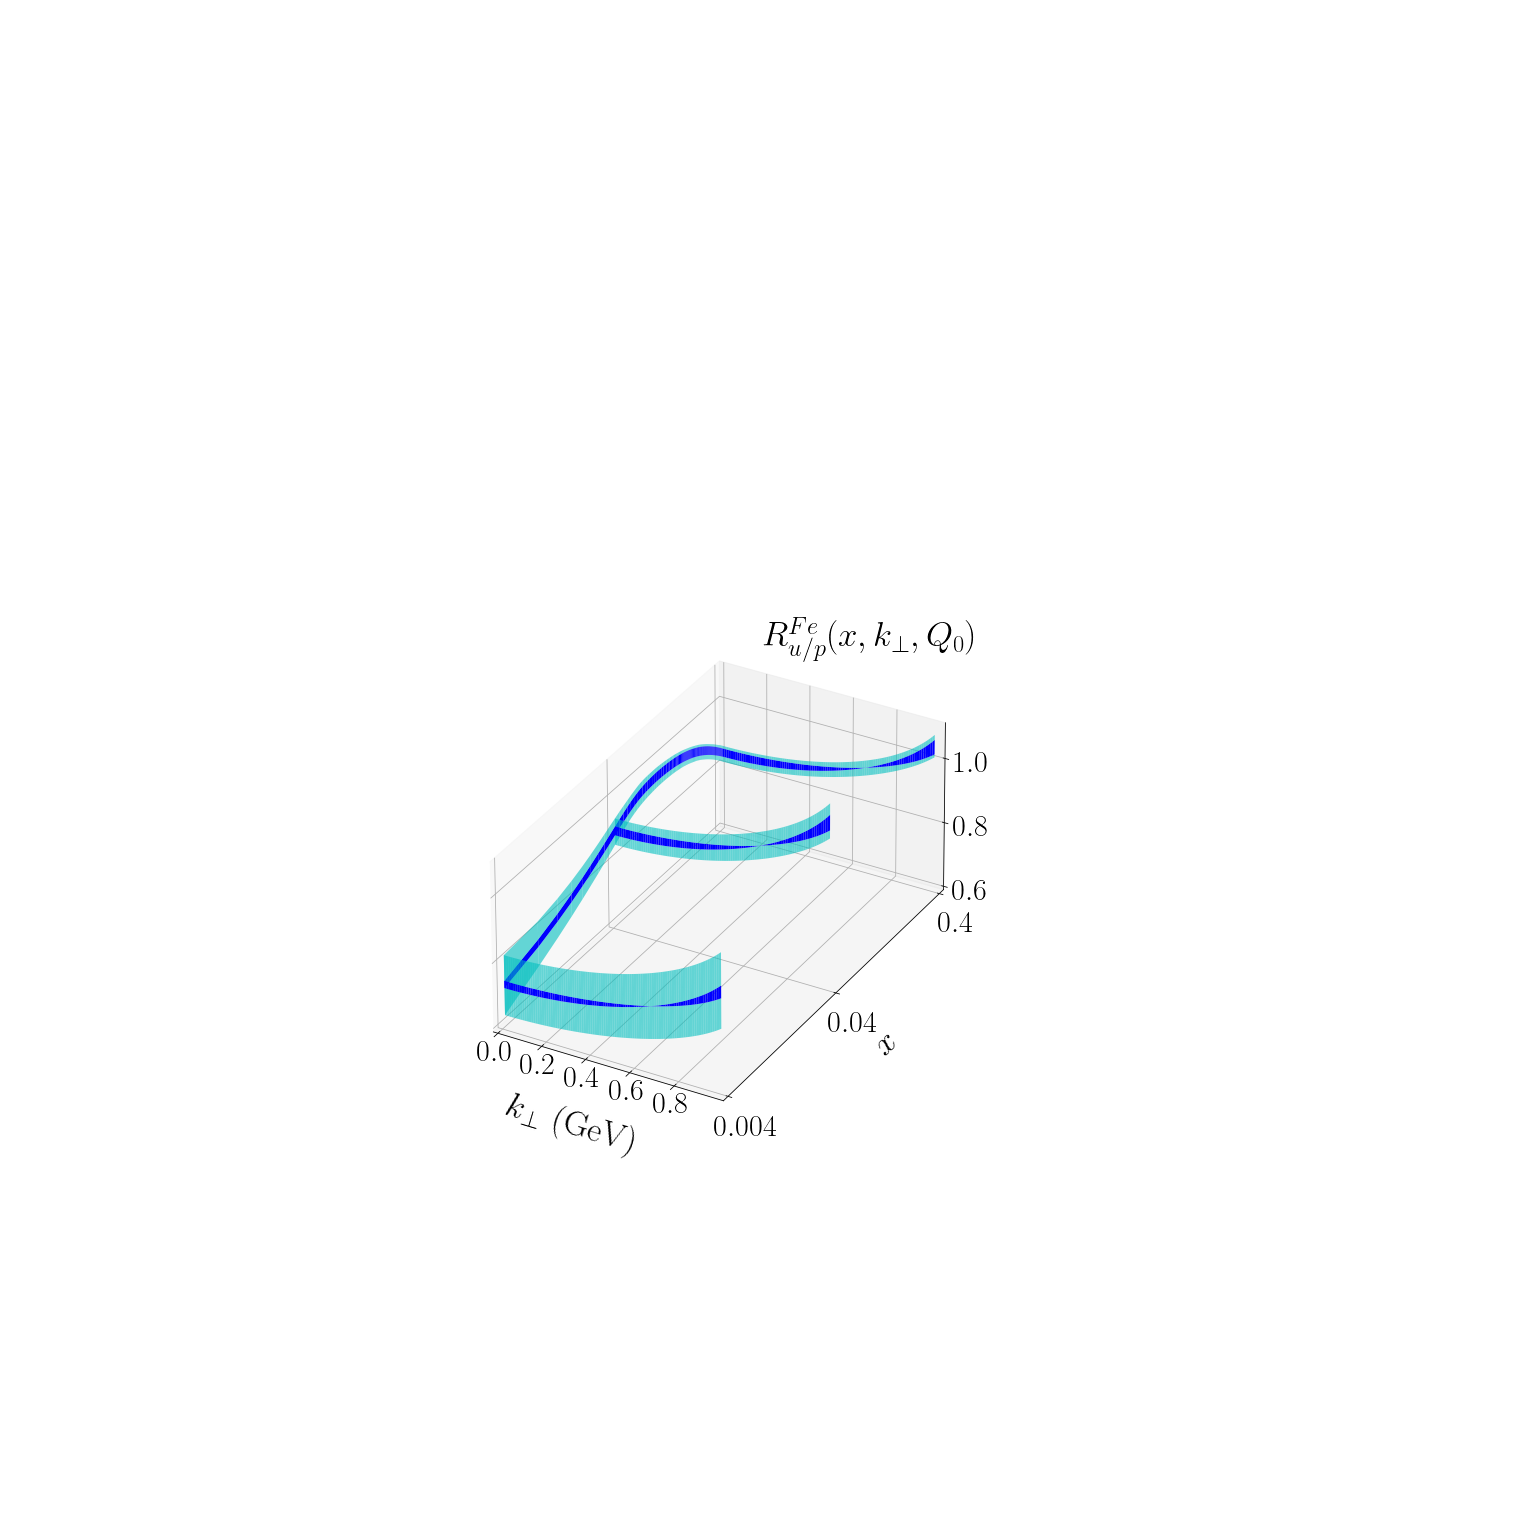

In [35]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0.01,1),ylim = (np.log10(0.004),np.log10(0.4)),zlim=(0.6,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4*8, 0.7*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])


clr = 'c0'
plot_3D_x2(ax,PDF_KT00_LOWQ2,u1,"x",0.01,clr,0.404)
plot_3D2(ax,PDF_X00_LOWQ2,u1,"kt",0.004,clr,1)
plot_3D2(ax,PDF_X02_LOWQ2,u1,"kt",0.04,clr,1)
plot_3D2(ax,PDF_X04_LOWQ2,u1,"kt",0.4,clr,1)
#plot_3D2(ax,PDF_X06_LOWQ2,u1,"kt",0.6,clr,1)


clr = 'blue'
plot_3D_ratio(ax,PDF_X00_LOWQ2,u1,"kt",0.004,clr,1)
plot_3D_ratio(ax,PDF_X02_LOWQ2,u1,"kt",0.04,clr,1)
plot_3D_ratio(ax,PDF_X04_LOWQ2,u1,"kt",0.4,clr,1)
#plot_3D_ratio(ax,PDF_X06_LOWQ2,u1,"kt",0.6,clr,1)
plot_3D_ratio_x(ax,PDF_KT00_LOWQ2,u1,"x",0.01,clr,0.404)



Size = 35

ax.set_xlabel(r"\rm $k_\perp$ (GeV)", fontsize = Size, labelpad = 100)
ax.set_ylabel(r"\rm $x$", fontsize = Size, labelpad = 150)
ax.zaxis.set_rotate_label(False)
#ax.set_title(r"\rm $R_{u/p}^{Fe}(x,k_{\perp},Q_0)$", pad =-650,fontsize = Size)
#ax.set_zlabel(r"\rm $R_{u/p}^{Fe}(x,k_{\perp},Q_0)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=40)
ax.tick_params(axis='y', pad=50)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)


ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax.set_yticks([np.log10(0.004),np.log10(0.04), np.log10(0.4)])
ax.set_yticklabels([r"\rm $0.004$",r"\rm $0.04$",r"\rm $0.4$"])

ax.set_zticks([0.6,0.8,1.0])

ax.dist = 35
 
props = dict(boxstyle='round', facecolor='white', alpha=0)


ax.text2D(0.50,0.577,  r"\rm $R_{u/p}^{Fe}(x,k_{\perp},Q_0)$", transform=ax.transAxes, size = Size)


fig.savefig("FE_PDF_LOWQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [36]:
from PyPDF2 import PdfFileWriter, PdfFileReader
original = "FE_PDF_LOWQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 470
top      = 600
right    = 530
bottom   = 359
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

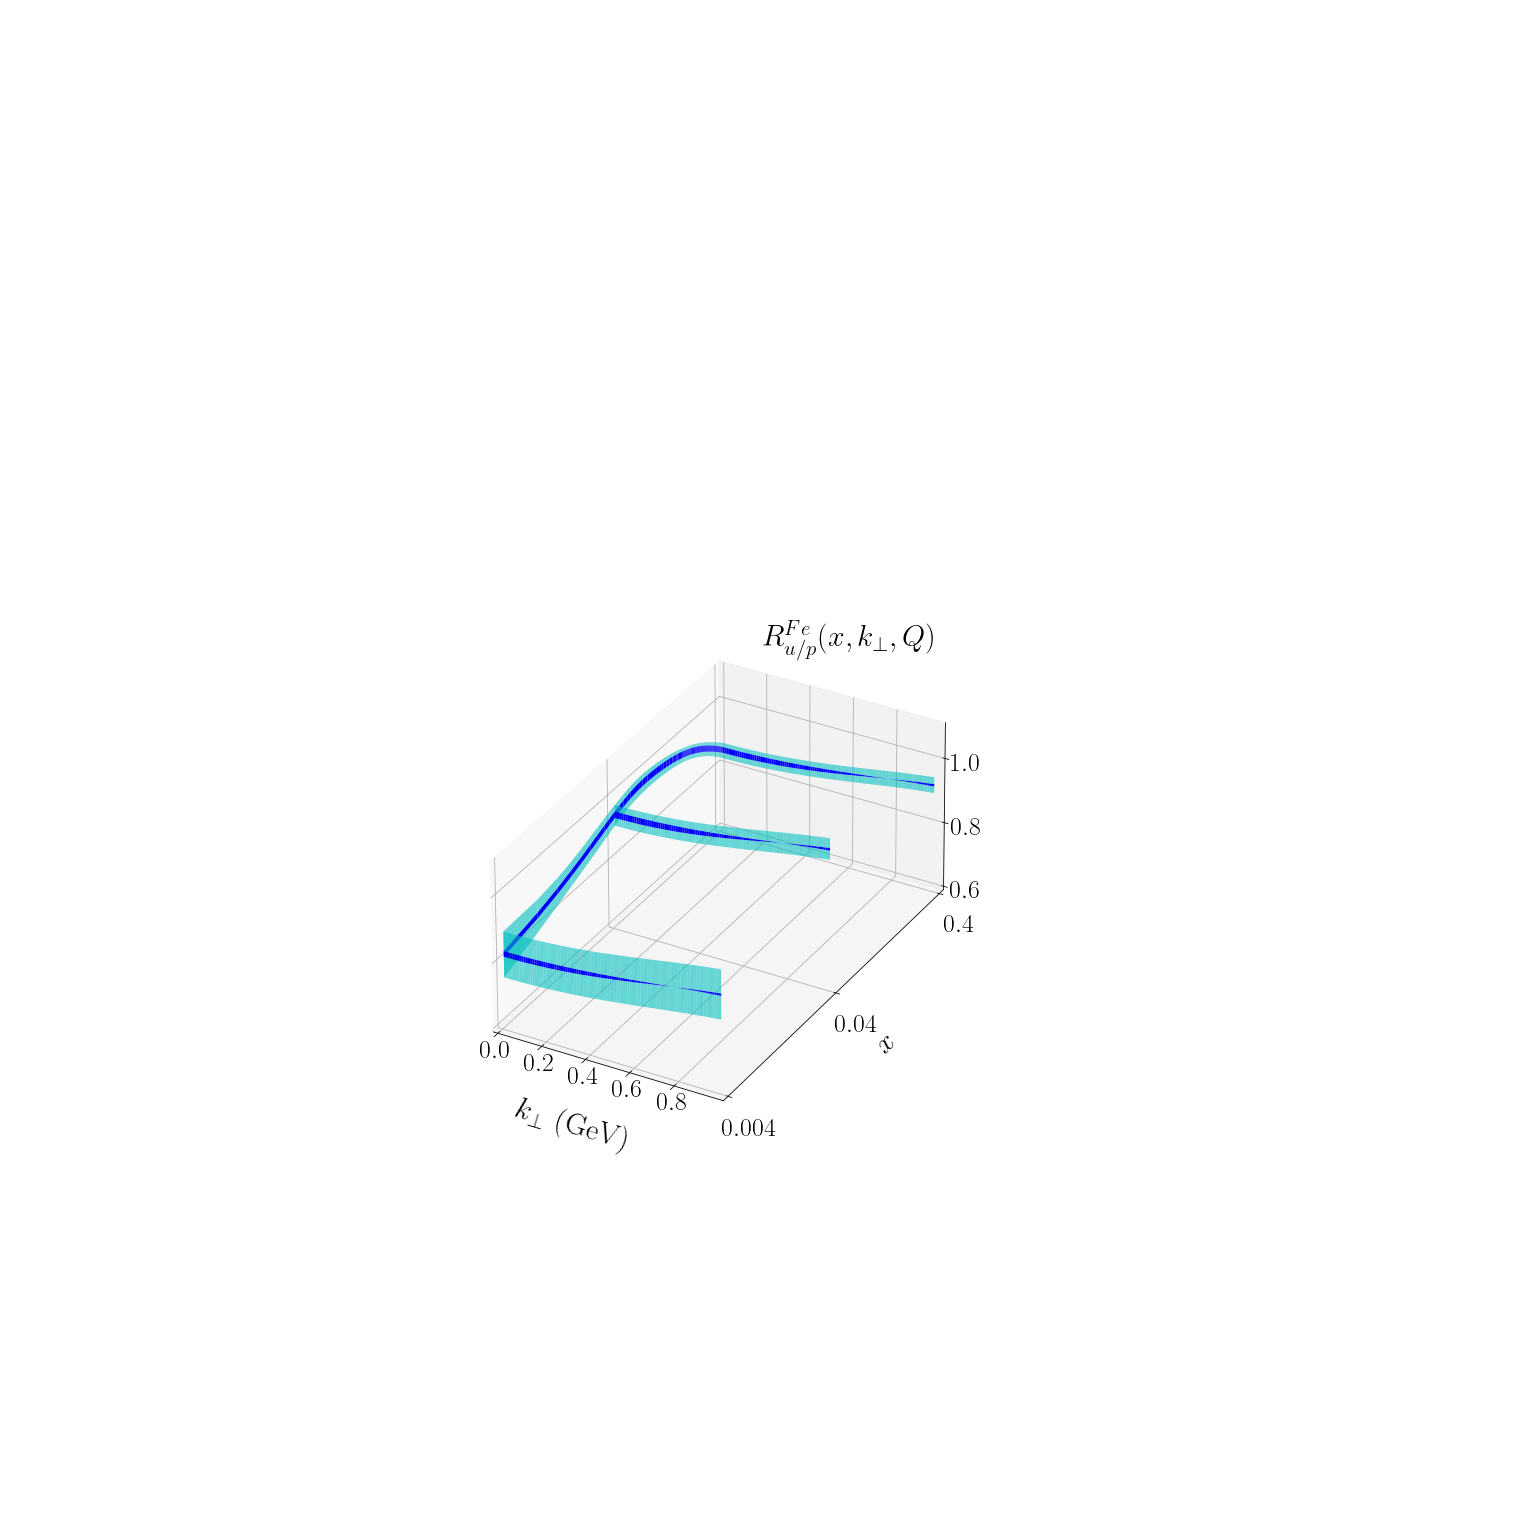

In [40]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0.01,1),ylim = (np.log10(0.004),np.log10(0.4)),zlim=(0.6,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4*8, 0.7*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])


clr = 'blue'
plot_3D_ratio(ax,PDF_X00_HIGHQ2,u1,"kt",0.004,clr,1)
plot_3D_ratio(ax,PDF_X02_HIGHQ2,u1,"kt",0.04,clr,1)
plot_3D_ratio(ax,PDF_X04_HIGHQ2,u1,"kt",0.4,clr,1)
#plot_3D_ratio(ax,PDF_X06_HIGHQ2,u1,"kt",0.6,clr,1)
plot_3D_ratio_x(ax,PDF_KT00_HIGHQ2,u1,"x",0.01,clr,0.404)

clr = 'c0'
plot_3D2(ax,PDF_X00_HIGHQ2,u1,"kt",0.004,clr,1)
plot_3D2(ax,PDF_X02_HIGHQ2,u1,"kt",0.04,clr,1)
plot_3D2(ax,PDF_X04_HIGHQ2,u1,"kt",0.4,clr,1)
#plot_3D2(ax,PDF_X06_HIGHQ2,u1,"kt",0.6,clr,1)
plot_3D_x2(ax,PDF_KT00_HIGHQ2,u1,"x",0.01,clr,0.404)


Size = 30

ax.set_xlabel(r"\rm $k_\perp$ (GeV)", fontsize = Size, labelpad = 100)
ax.set_ylabel(r"\rm $x$", fontsize = Size, labelpad = 150)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R_{u/p}^{Fe}(x,k_{\perp},Q)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=60)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)


ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax.set_yticks([np.log10(0.004),np.log10(0.04), np.log10(0.4)])
ax.set_yticklabels([r"\rm $0.004$",r"\rm $0.04$",r"\rm $0.4$"])


ax.set_zticks([0.6,0.8,1.0])


ax.dist = 35

props = dict(boxstyle='round', facecolor='white', alpha=0)

ax.text2D(0.50,0.577, r"\rm $R_{u/p}^{Fe}(x,k_{\perp},Q)$", transform=ax.transAxes, size = Size)


fig.savefig("FE_PDF_HIGHQ.pdf",bbox_inches = "tight")



In [41]:
original = "FE_PDF_HIGHQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 470
top      = 600
right    = 530
bottom   = 359
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

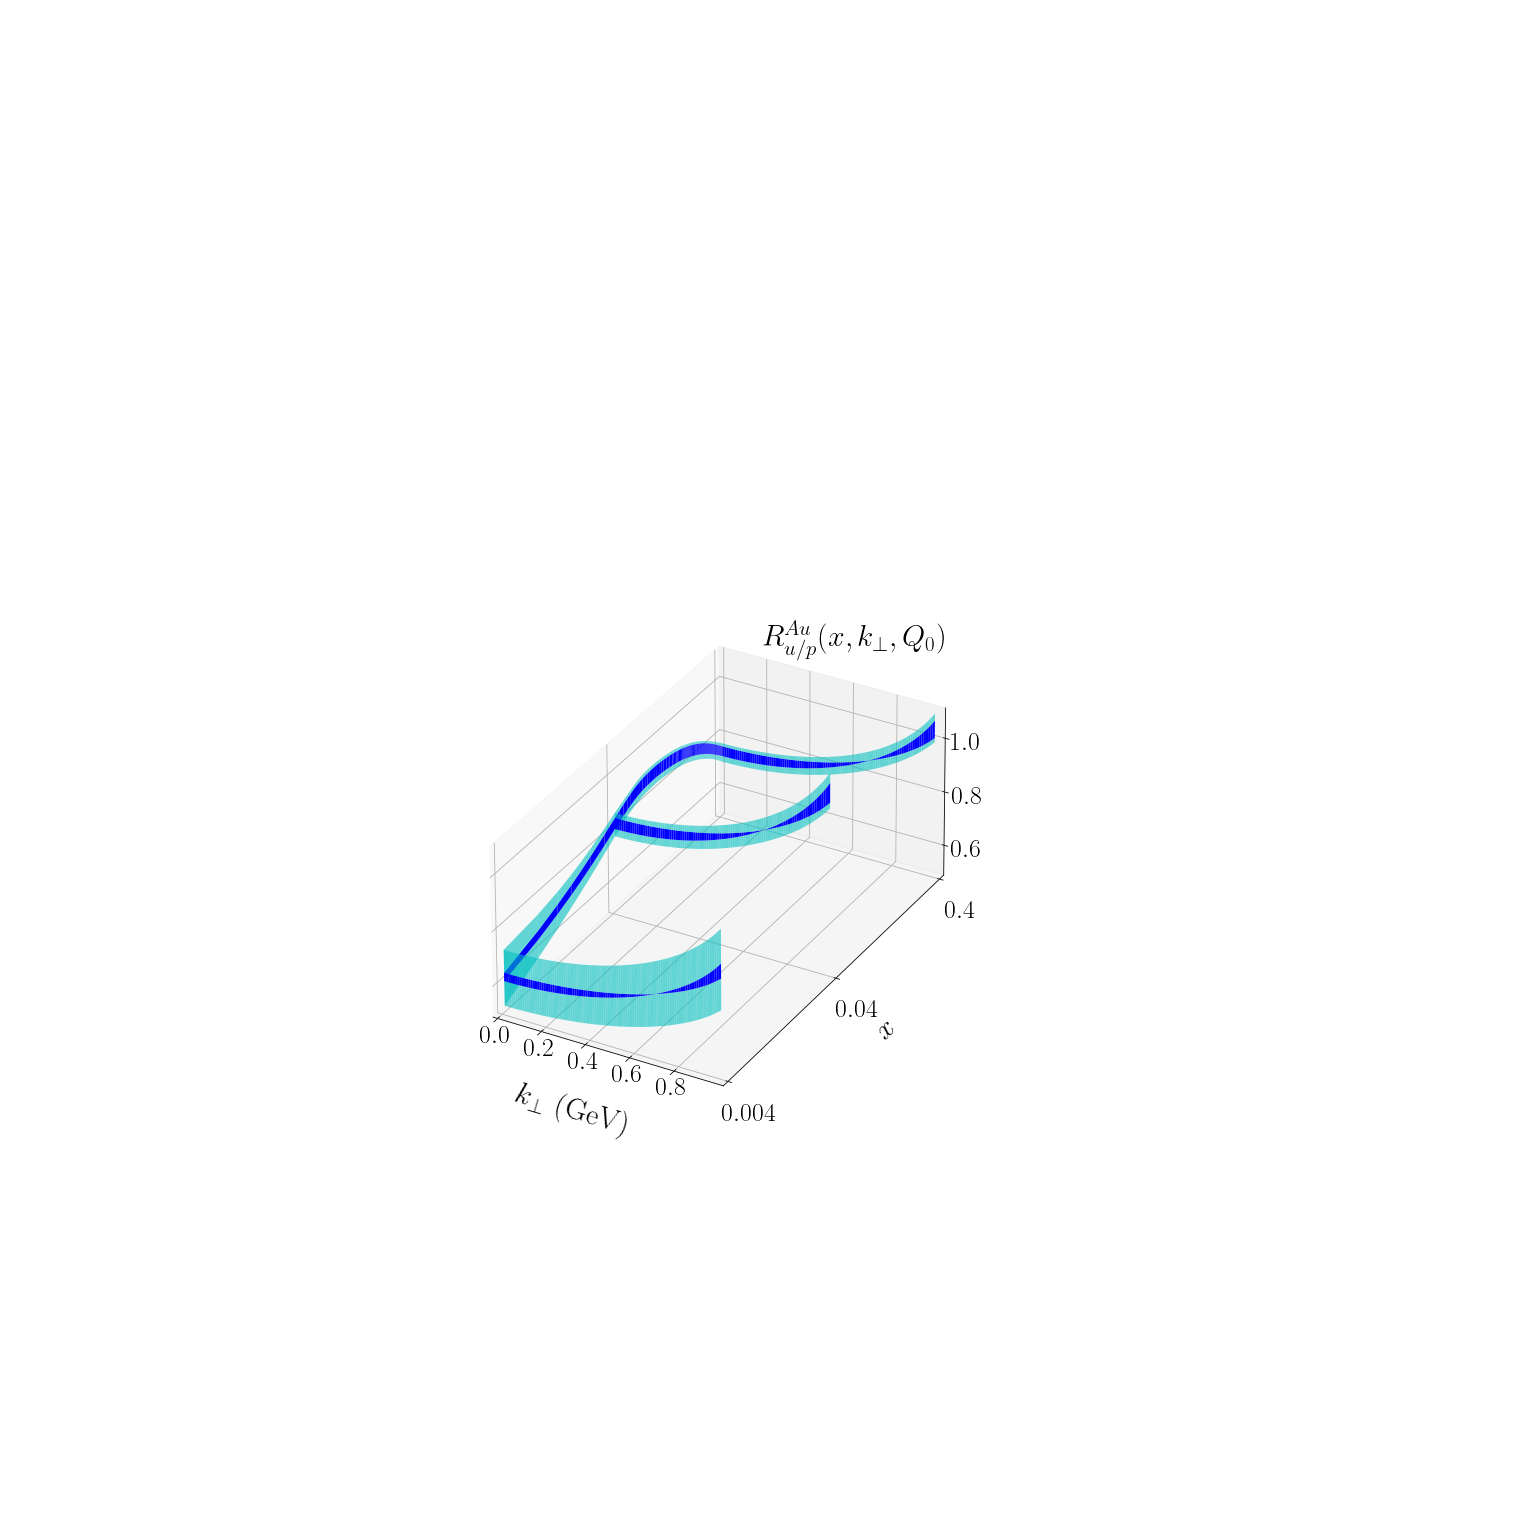

In [42]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0.01,1),ylim = (np.log10(0.004),np.log10(0.4)),zlim=(0.5,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4*8, 0.7*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])


clr = 'blue'
plot_3D_ratio(ax,PDF_X00_LOWQ2,u2,"kt",0.004,clr,1)
plot_3D_ratio(ax,PDF_X02_LOWQ2,u2,"kt",0.04,clr,1)
plot_3D_ratio(ax,PDF_X04_LOWQ2,u2,"kt",0.4,clr,1)
#plot_3D_ratio(ax,PDF_X06_LOWQ2,u2,"kt",0.6,clr,1)
plot_3D_ratio_x(ax,PDF_KT00_LOWQ2,u2,"x",0.01,clr,0.404)

clr = 'c0'
plot_3D2(ax,PDF_X00_LOWQ2,u2,"kt",0.004,clr,1)
plot_3D2(ax,PDF_X02_LOWQ2,u2,"kt",0.04,clr,1)
plot_3D2(ax,PDF_X04_LOWQ2,u2,"kt",0.4,clr,1)
#plot_3D2(ax,PDF_X06_LOWQ2,u2,"kt",0.6,clr,1)
plot_3D_x2(ax,PDF_KT00_LOWQ2,u2,"x",0.01,clr,0.404)


Size = 30

ax.set_xlabel(r"\rm $k_\perp$ (GeV)", fontsize = Size, labelpad = 100)
ax.set_ylabel(r"\rm $x$", fontsize = Size, labelpad = 150)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R_{u/p}^{Au}(x,k_{\perp},Q_0)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=60)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)


ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax.set_yticks([np.log10(0.004),np.log10(0.04), np.log10(0.4)])
ax.set_yticklabels([r"\rm $0.004$",r"\rm $0.04$",r"\rm $0.4$"])

ax.set_zticks([0.6,0.8,1.0])


ax.dist = 35

props = dict(boxstyle='round', facecolor='white', alpha=0)


ax.text2D(0.50,0.577, r"\rm $R_{u/p}^{Au}(x,k_{\perp},Q_0)$", transform=ax.transAxes, size = Size)


fig.savefig("AU_PDF_LOWQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [79]:
original = "AU_PDF_LOWQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 470
top      = 600
right    = 530
bottom   = 375
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

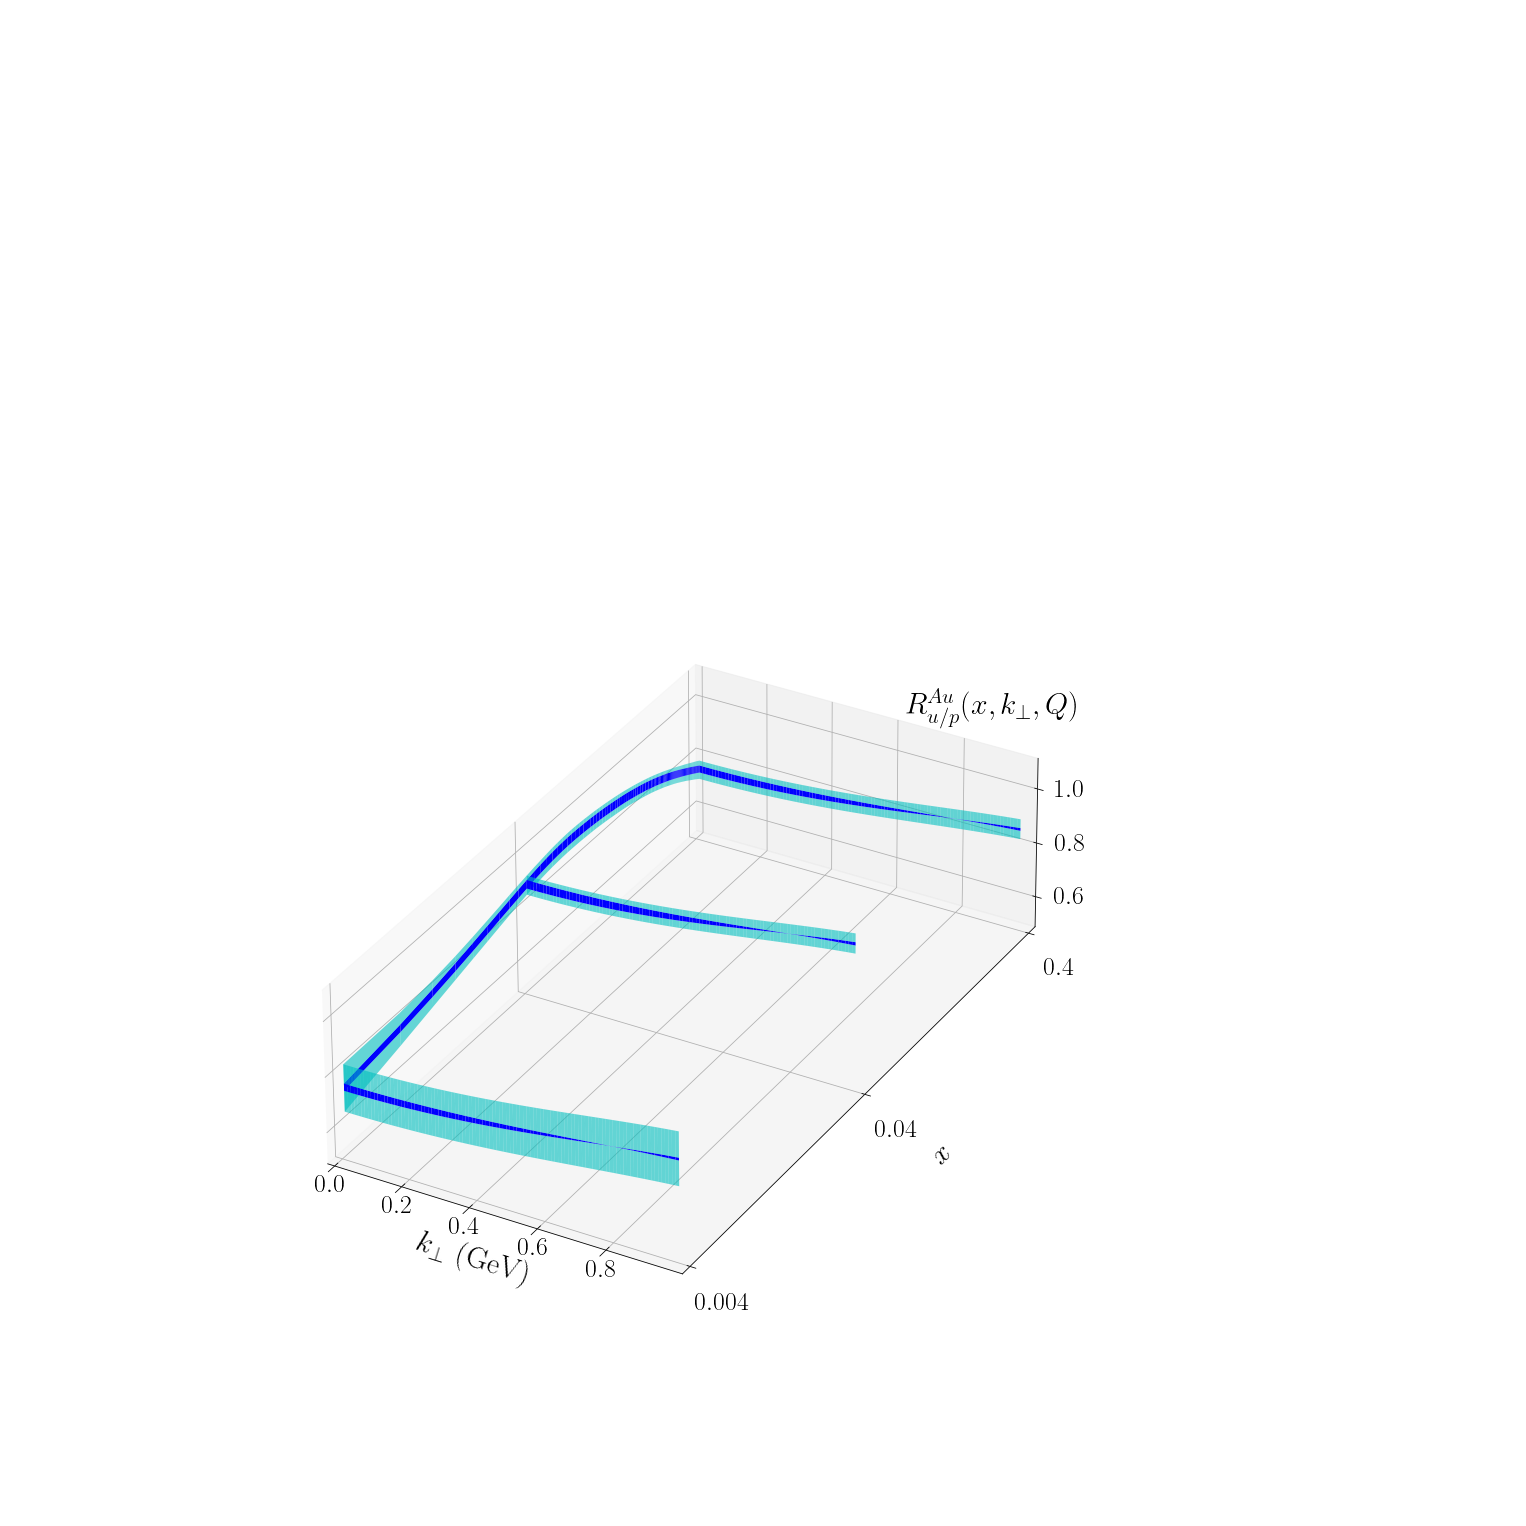

In [185]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0.01,1),ylim = (np.log10(0.004),np.log10(0.4)),zlim=(0.5,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6*8, 1.1*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])


clr = 'blue'
plot_3D_ratio(ax,PDF_X00_HIGHQ2,u2,"kt",0.004,clr,1)
plot_3D_ratio(ax,PDF_X02_HIGHQ2,u2,"kt",0.04,clr,1)
plot_3D_ratio(ax,PDF_X04_HIGHQ2,u2,"kt",0.4,clr,1)
#plot_3D_ratio(ax,PDF_X06_HIGHQ2,u2,"kt",0.6,clr,1)
plot_3D_ratio_x(ax,PDF_KT00_HIGHQ2,u2,"x",0.01,clr,0.404)

clr = 'c0'
plot_3D2(ax,PDF_X00_HIGHQ2,u2,"kt",0.004,clr,1)
plot_3D2(ax,PDF_X02_HIGHQ2,u2,"kt",0.04,clr,1)
plot_3D2(ax,PDF_X04_HIGHQ2,u2,"kt",0.4,clr,1)
#plot_3D2(ax,PDF_X06_HIGHQ2,u2,"kt",0.6,clr,1)
plot_3D_x2(ax,PDF_KT00_HIGHQ2,u2,"x",0.01,clr,0.404)

Size = 30

ax.set_xlabel(r"\rm $k_\perp$ (GeV)", fontsize = Size, labelpad = 40)
ax.set_ylabel(r"\rm $x$", fontsize = Size, labelpad = 150)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R_{u/p}^{Au}(x,k_{\perp},Q)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=60)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)


ax.set_xticks([0.0,0.2,0.4,0.6,0.8])
ax.set_yticks([np.log10(0.004),np.log10(0.04), np.log10(0.4)])
ax.set_yticklabels([r"\rm $0.004$",r"\rm $0.04$",r"\rm $0.4$"])


ax.set_zticks([0.6,0.8,1.0])

props = dict(boxstyle='round', facecolor='white', alpha=0)

ax.text(-5, 600,0.8, r"\rm $R_{u/p}^{Au}(x,k_{\perp},Q)$", transform=ax.transAxes, fontsize=Size,
verticalalignment='top', bbox=props)

ax.dist = 35

fig.savefig("AU_PDF_HIGHQ.pdf",bbox_inches = "tight")



In [73]:
original = "AU_PDF_HIGHQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 300
top      = 660
right    = 400
bottom   = 200
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

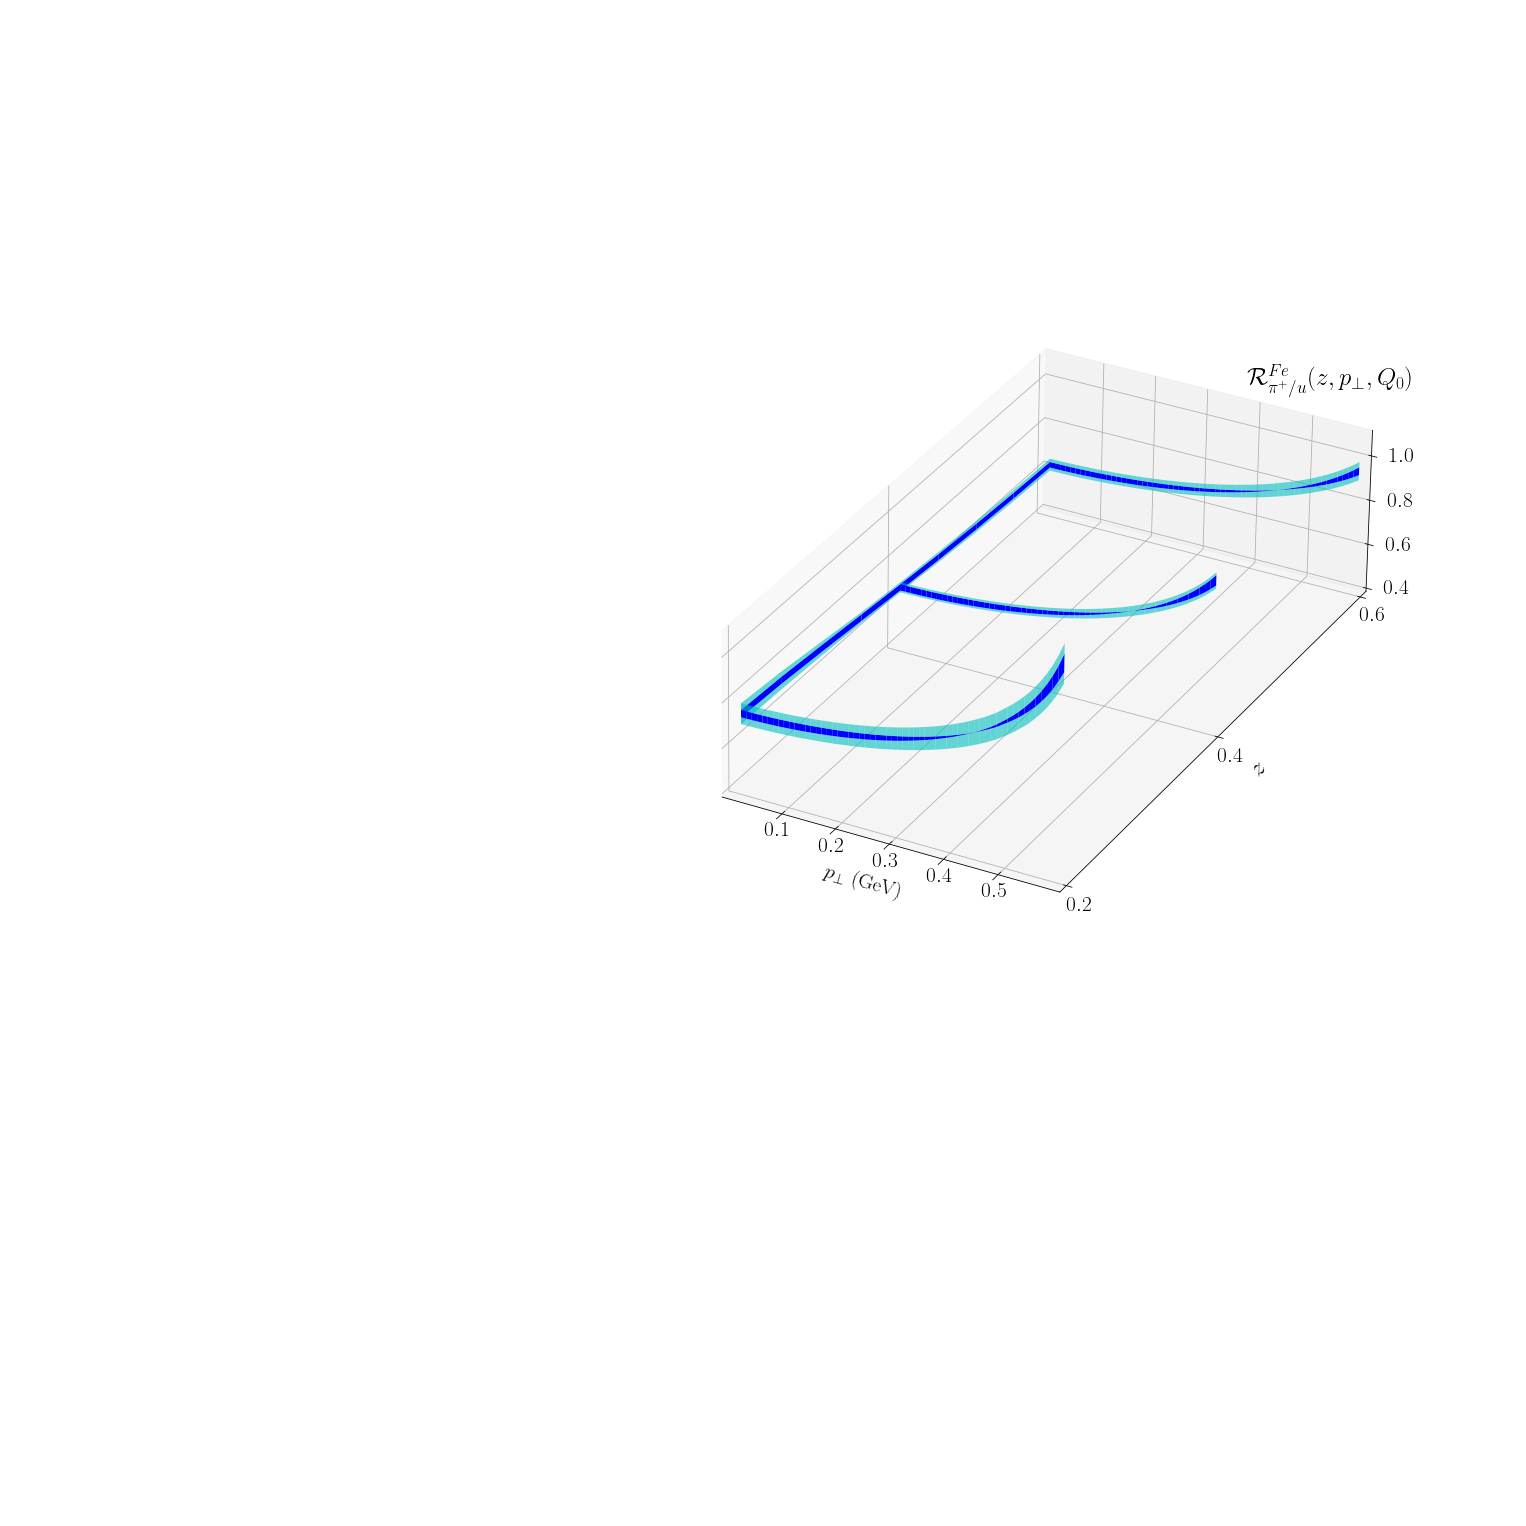

In [44]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0,0.6), ylim=(0.2,0.6),zlim=(0.4,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6*8, 1.1*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])

clr = 'blue'
plot_3D_ratio3(ax,FF_X00_LOWQ2,u1,"pt",0.2,clr,0.6)
#plot_3D_ratio3(ax,FF_X03_LOWQ2,u1,"pt",0.3,clr,0.6)
plot_3D_ratio3(ax,FF_X05_LOWQ2,u1,"pt",0.4,clr,0.6)
plot_3D_ratio3(ax,FF_X07_LOWQ2,u1,"pt",0.6,clr,0.6)
plot_3D_ratio_x3(ax,FF_PT00_LOWQ2,u1,"z",0.01,clr,0.61)


clr = 'c0'
plot_3D23(ax,FF_X00_LOWQ2,u1,"pt",0.2,clr,0.6)
#plot_3D23(ax,FF_X03_LOWQ2,u1,"pt",0.3,clr,0.6)
plot_3D23(ax,FF_X05_LOWQ2,u1,"pt",0.4,clr,0.6)
plot_3D23(ax,FF_X07_LOWQ2,u1,"pt",0.6,clr,0.6)
plot_3D_x23(ax,FF_PT00_LOWQ2,u1,"z",0.01,clr,0.61)

Size = 25

ax.set_xlabel(r"\rm $p_\perp$ (GeV)", fontsize = Size/1.2, labelpad = 40)
ax.set_ylabel(r"\rm $z$", fontsize = Size, labelpad = 75)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R^{Fe}_{\pi^+/u}(z, p_\perp, Q_0)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=20)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)

ax.set_xticks([0.1,0.2,0.3,0.4,0.5])
ax.set_yticks([0.2,0.4,0.6])
ax.set_zticks([0.4,0.6,0.8,1.0])

props = dict(boxstyle='round', facecolor='white', alpha=0)

ax.text2D(0.82,0.75, r"\rm $\mathcal{R}^{Fe}_{\pi^+/u}(z, p_\perp, Q_0)$", transform=ax.transAxes, size = Size)

ax.dist = 35


fig.savefig("FE_FF_LOWQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [194]:
original = "FE_FF_LOWQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 700
top      = 340
right    = 40
bottom   = 600
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

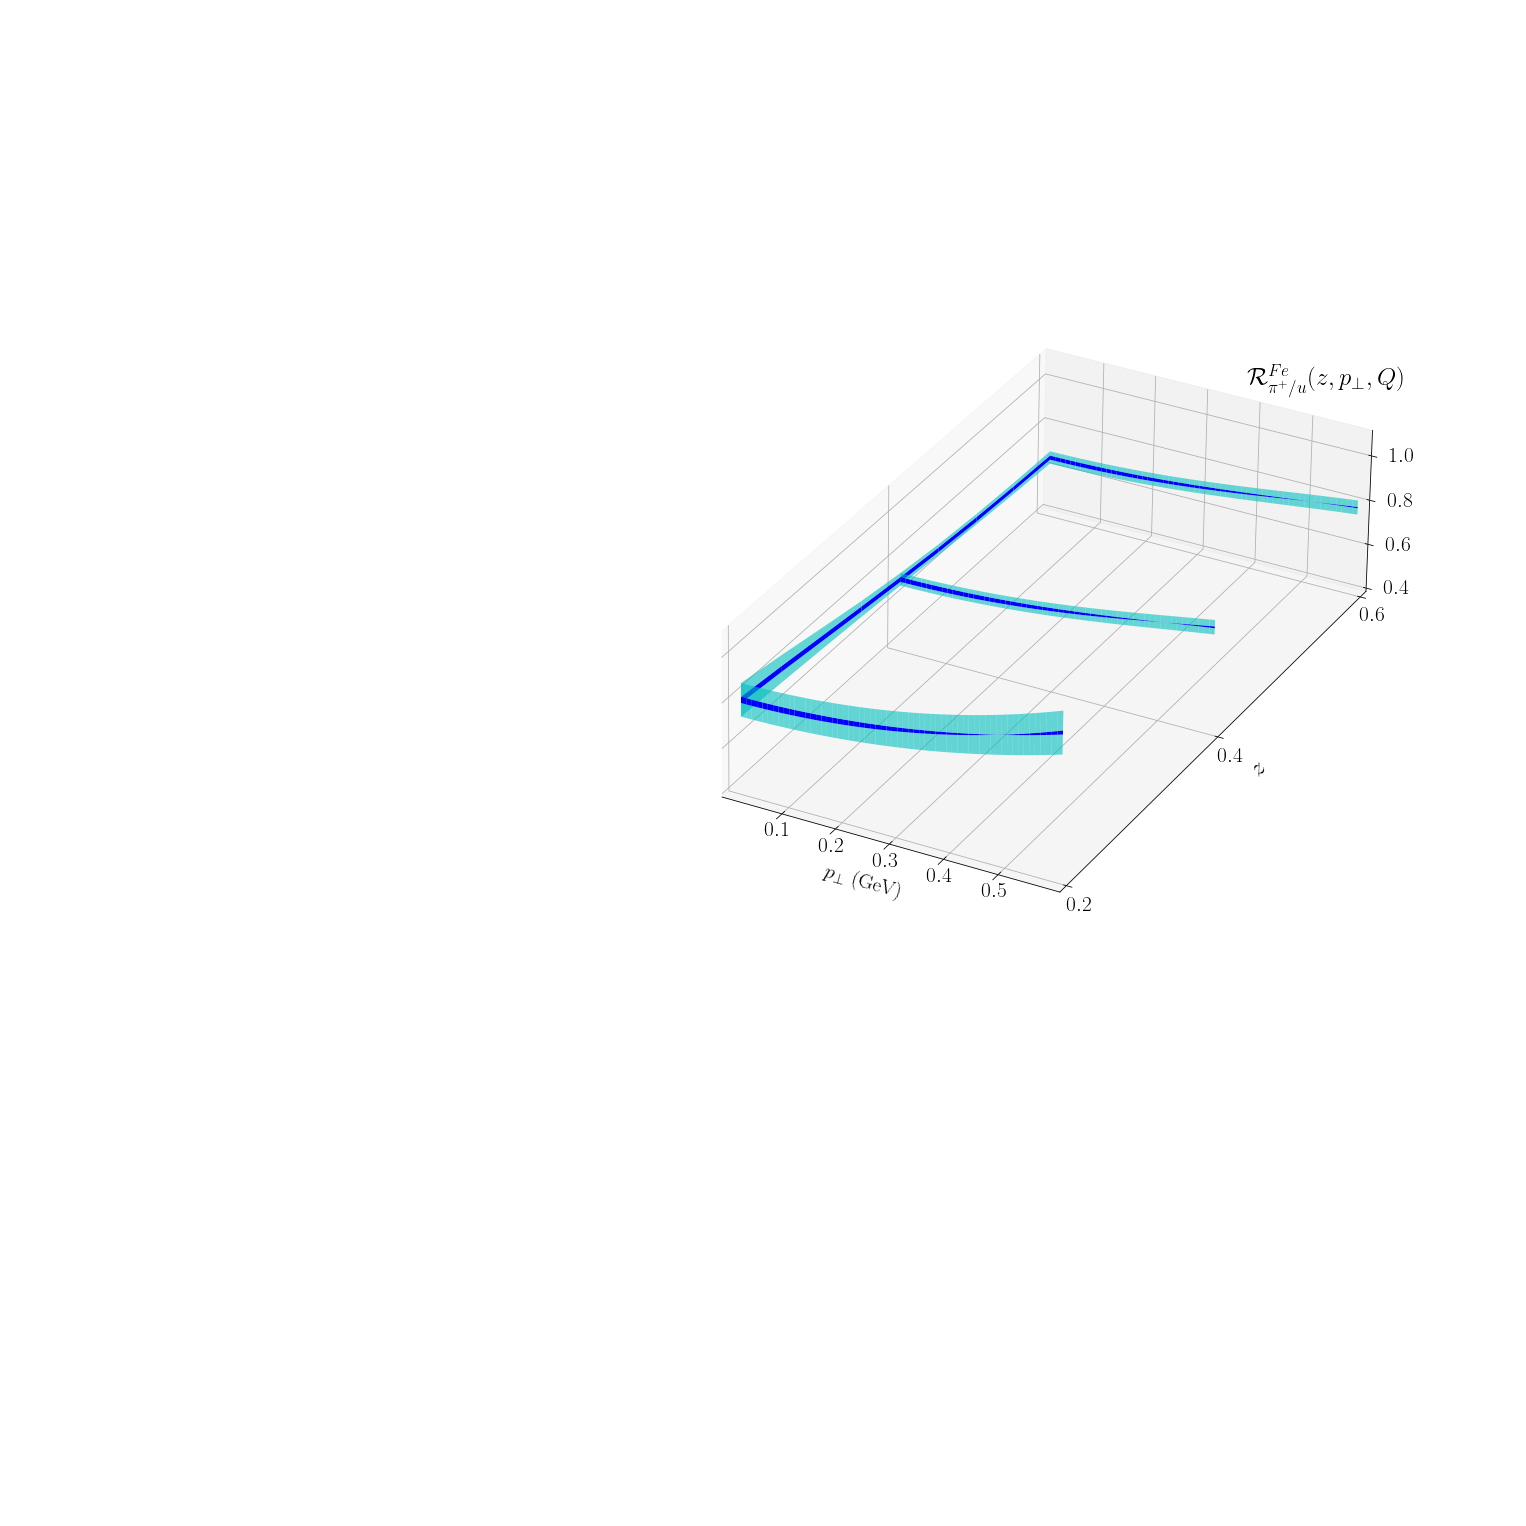

In [195]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0,0.6), ylim=(0.2,0.6),zlim=(0.4,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6*8, 1.1*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])


clr = 'blue'
plot_3D_ratio3(ax,FF_X00_HIGHQ2,u1,"pt",0.2,clr,0.6)
#plot_3D_ratio3(ax,FF_X03_HIGHQ2,u1,"pt",0.3,clr,0.6)
plot_3D_ratio3(ax,FF_X05_HIGHQ2,u1,"pt",0.4,clr,0.6)
plot_3D_ratio3(ax,FF_X07_HIGHQ2,u1,"pt",0.6,clr,0.6)
plot_3D_ratio_x3(ax,FF_PT00_HIGHQ2,u1,"z",0.01,clr,0.61)


clr = 'c0'
plot_3D23(ax,FF_X00_HIGHQ2,u1,"pt",0.2,clr,0.6)
#plot_3D23(ax,FF_X03_HIGHQ2,u1,"pt",0.3,clr,0.6)
plot_3D23(ax,FF_X05_HIGHQ2,u1,"pt",0.4,clr,0.6)
plot_3D23(ax,FF_X07_HIGHQ2,u1,"pt",0.6,clr,0.6)
plot_3D_x23(ax,FF_PT00_HIGHQ2,u1,"z",0.01,clr,0.61)

Size = 25

ax.set_xlabel(r"\rm $p_\perp$ (GeV)", fontsize = Size/1.2, labelpad = 40)
ax.set_ylabel(r"\rm $z$", fontsize = Size, labelpad = 75)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R^{Fe}_{\pi^+/u}(z, p_\perp, Q)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=20)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)

ax.set_xticks([0.1,0.2,0.3,0.4,0.5])
ax.set_yticks([0.2,0.4,0.6])
ax.set_zticks([0.4,0.6,0.8,1.0])


ax.dist = 35

ax.text2D(0.82,0.75, r"\rm $\mathcal{R}^{Fe}_{\pi^+/u}(z, p_\perp, Q)$", transform=ax.transAxes, size = Size)


fig.savefig("FE_FF_HIGHQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [196]:
original = "FE_FF_HIGHQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 700
top      = 340
right    = 40
bottom   = 600
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

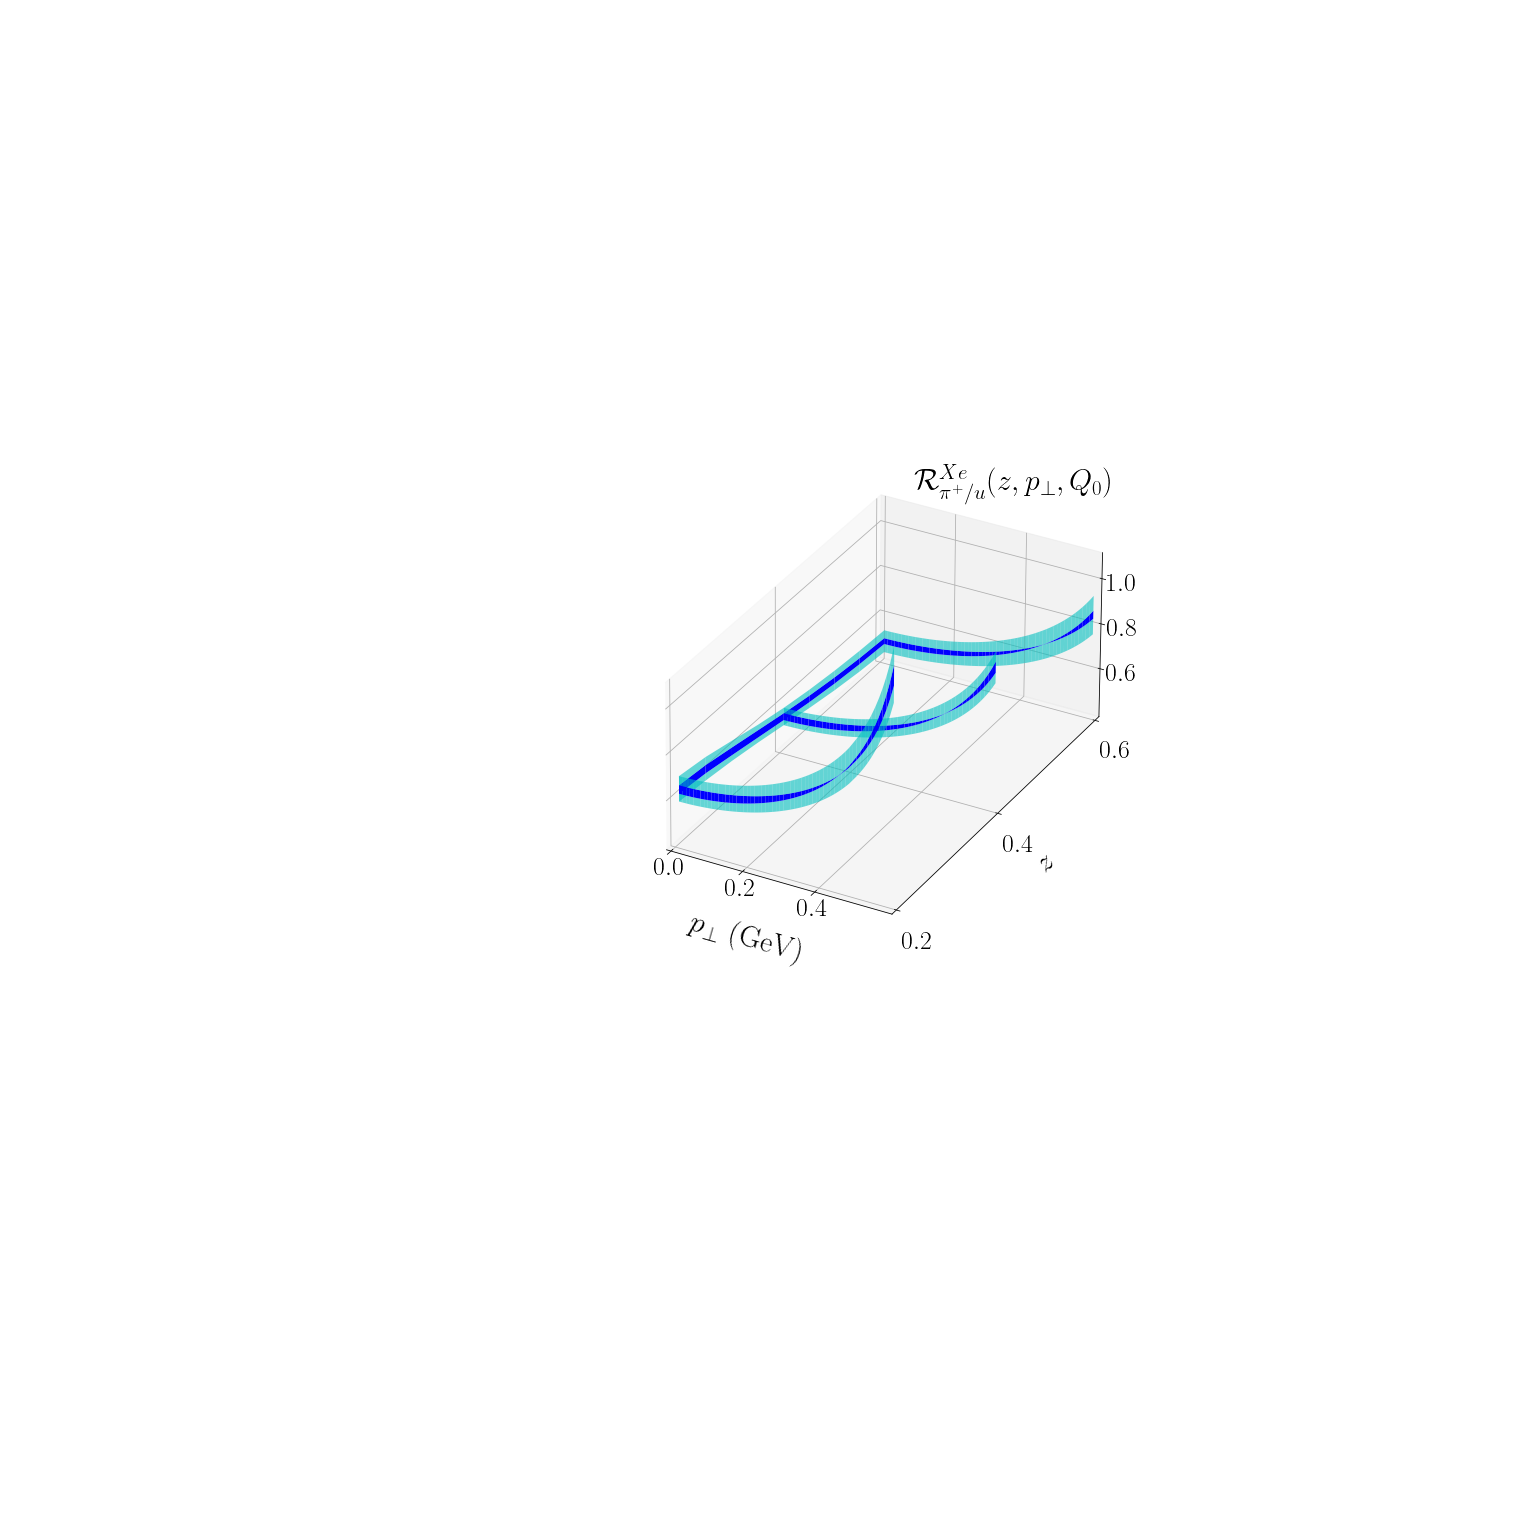

In [59]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0,0.6), ylim=(0.2,0.6),zlim=(0.4,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.4*8, 0.7*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])

clr = 'blue'
plot_3D_ratio3(ax,FF_X00_LOWQ2,u2,"pt",0.2,clr,0.6)
#plot_3D_ratio3(ax,FF_X03_LOWQ2,u2,"pt",0.3,clr,0.6)
plot_3D_ratio3(ax,FF_X05_LOWQ2,u2,"pt",0.4,clr,0.6)
plot_3D_ratio3(ax,FF_X07_LOWQ2,u2,"pt",0.6,clr,0.6)
plot_3D_ratio_x3(ax,FF_PT00_LOWQ2,u2,"z",0.01,clr,0.61)

clr = 'c0'
plot_3D23(ax,FF_X00_LOWQ2,u2,"pt",0.2,clr,0.6)
#plot_3D23(ax,FF_X03_LOWQ2,u2,"pt",0.3,clr,0.6)
plot_3D23(ax,FF_X05_LOWQ2,u2,"pt",0.4,clr,0.6)
plot_3D23(ax,FF_X07_LOWQ2,u2,"pt",0.6,clr,0.6)
plot_3D_x23(ax,FF_PT00_LOWQ2,u2,"z",0.01,clr,0.61)

Size = 30

ax.set_xlabel(r"\rm $p_\perp$ (GeV)", fontsize = Size, labelpad = 100)
ax.set_ylabel(r"\rm $z$", fontsize = Size, labelpad = 150)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R^{Xe}_{\pi^+/u}(z, p_\perp, Q_0)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=60)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)

ax.set_xticks([0,0.2,0.4])
ax.set_yticks([0.2,0.4,0.6])
ax.set_zticks([0.6,0.8,1.0])


ax.dist = 35

ax.text2D(0.60,0.68, r"\rm $\mathcal{R}^{Xe}_{\pi^+/u}(z, p_\perp, Q_0)$", transform=ax.transAxes, size = Size)


fig.savefig("XE_FF_LOWQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [72]:
original = "XE_FF_LOWQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 640
top      = 450
right    = 350
bottom   = 550
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()

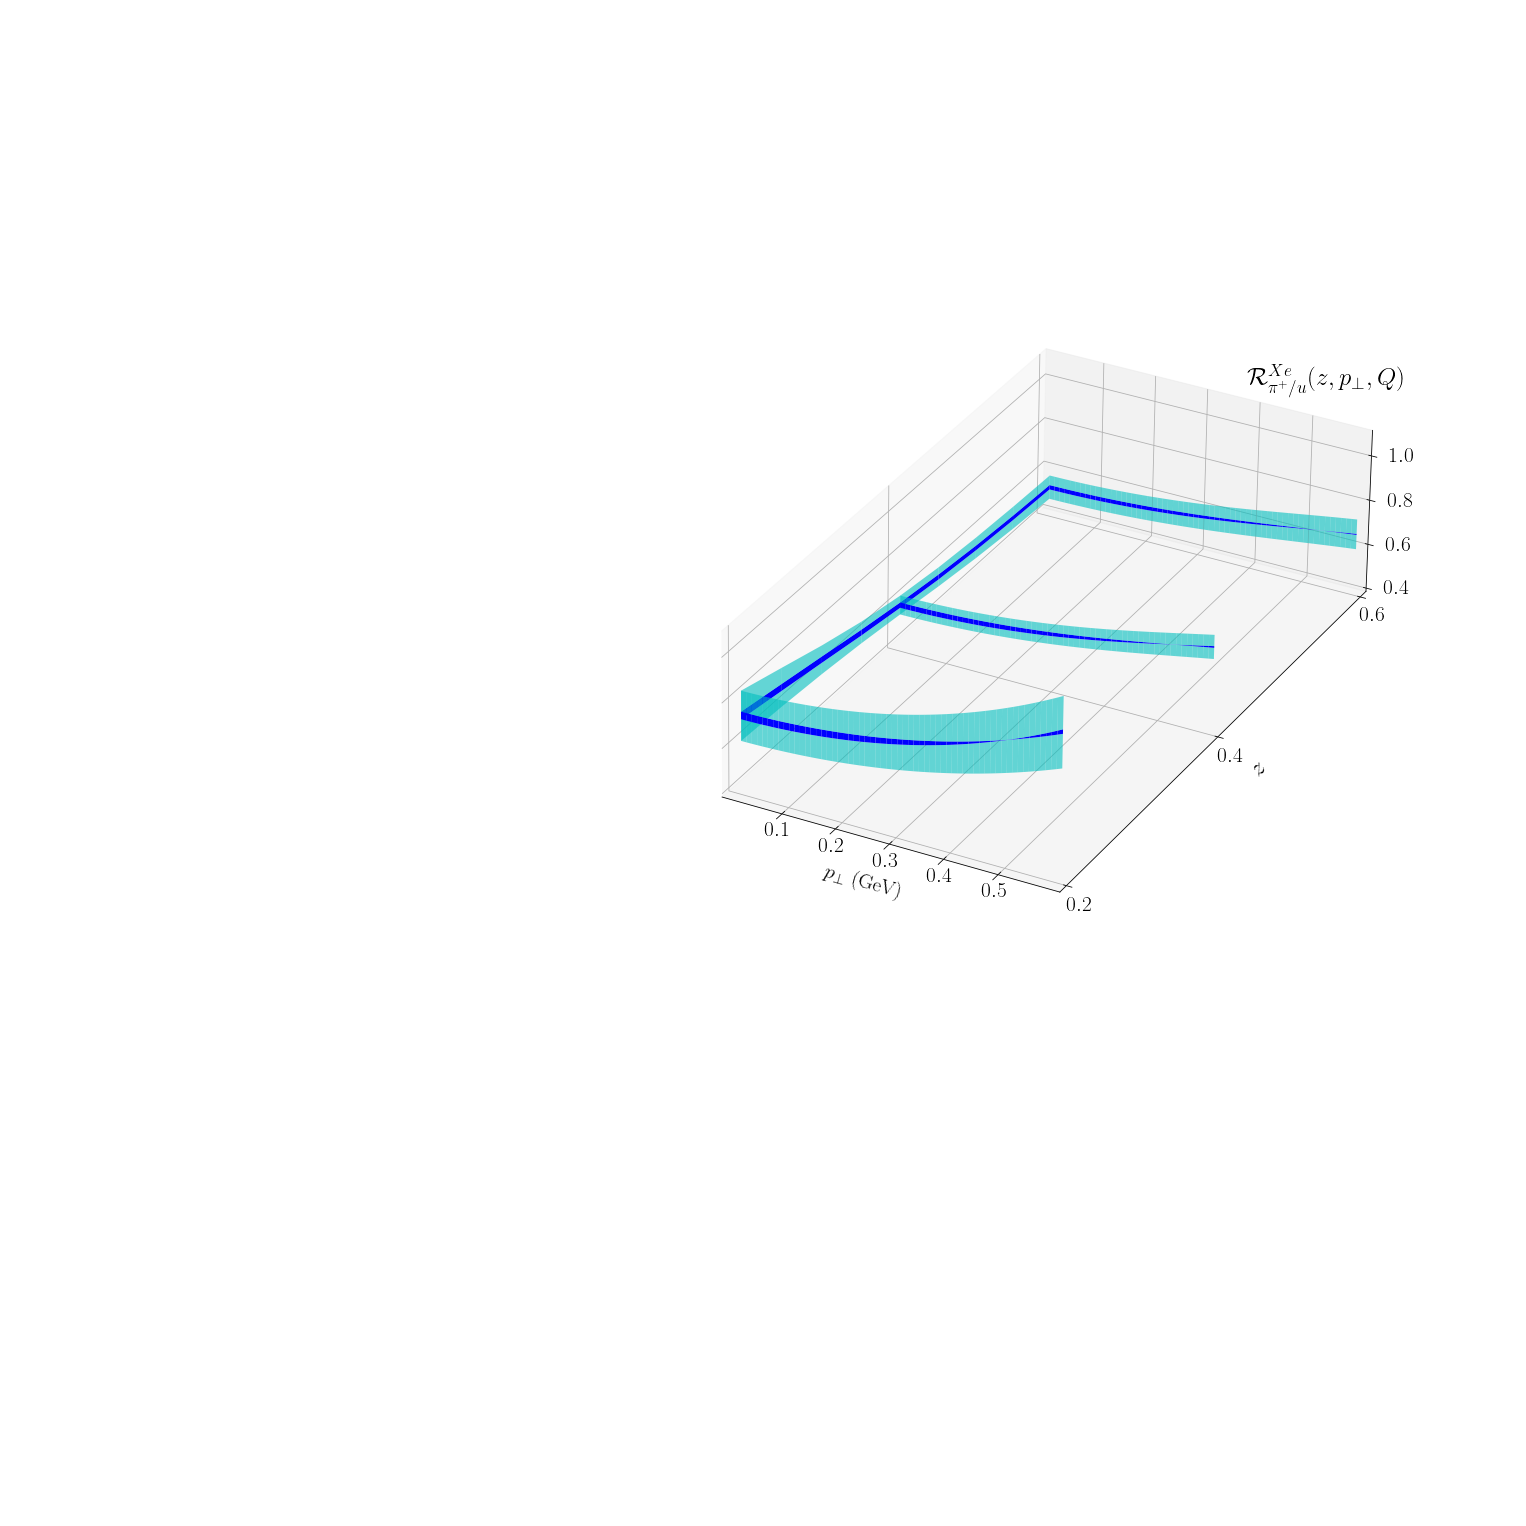

In [199]:
# Plotting part. Figure and axes creation.
fig = plt.figure(figsize=(14,14))
#ax = fig.add_subplot(111, projection='3d', xlim=(0.01,1), ylim=(0.0,0.6),zlim=(0.6,1.1))
ax = fig.gca(projection='3d',xlim=(0,0.6), ylim=(0.2,0.6),zlim=(0.4,1.1))
clr = 'blue'

ax.set_proj_type('persp')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.6*8, 1.1*8, 0.30*8,3]))
ax.view_init(azim=-61,elev=30)
ax.set_position([-1, 1, 1.5, 1.5])

clr = 'blue'
plot_3D_ratio3(ax,FF_X00_HIGHQ2,u2,"pt",0.2,clr,0.6)
#plot_3D_ratio3(ax,FF_X03_HIGHQ2,u2,"pt",0.3,clr,0.6)
plot_3D_ratio3(ax,FF_X05_HIGHQ2,u2,"pt",0.4,clr,0.6)
plot_3D_ratio3(ax,FF_X07_HIGHQ2,u2,"pt",0.6,clr,0.6)
plot_3D_ratio_x3(ax,FF_PT00_HIGHQ2,u2,"z",0.01,clr,0.61)


clr = 'c0'
plot_3D23(ax,FF_X00_HIGHQ2,u2,"pt",0.2,clr,0.6)
#plot_3D23(ax,FF_X03_HIGHQ2,u2,"pt",0.3,clr,0.6)
plot_3D23(ax,FF_X05_HIGHQ2,u2,"pt",0.4,clr,0.6)
plot_3D23(ax,FF_X07_HIGHQ2,u2,"pt",0.6,clr,0.6)
plot_3D_x23(ax,FF_PT00_HIGHQ2,u2,"z",0.01,clr,0.61)

Size = 25

ax.set_xlabel(r"\rm $p_\perp$ (GeV)", fontsize = Size/1.2, labelpad = 40)
ax.set_ylabel(r"\rm $z$", fontsize = Size, labelpad = 75)
ax.zaxis.set_rotate_label(False)
#ax.set_zlabel(r"\rm $R^{Xe}_{\pi^+/u}(z, p_\perp, Q)$", fontsize = Size,rotation = 0,labelpad =150)
ax.tick_params(axis='z', pad=30)
ax.tick_params(axis='y', pad=20)
ax.tick_params(axis = 'both', direction ='in',labelsize = Size*30/35)

ax.set_xticks([0.1,0.2,0.3,0.4,0.5])
ax.set_yticks([0.2,0.4,0.6])
ax.set_zticks([0.4,0.6,0.8,1.0])


ax.dist = 35

ax.text2D(0.82,0.75, r"\rm $\mathcal{R}^{Xe}_{\pi^+/u}(z, p_\perp, Q)$", transform=ax.transAxes, size = Size)




fig.savefig("XE_FF_HIGHQ.pdf",bbox_inches = "tight",pad_inches = 0)



In [200]:
original = "XE_FF_HIGHQ.pdf"
target   = original[:-4] + '.cropped.pdf'
left     = 700
top      = 340
right    = 40
bottom   = 600
pdf = PdfFileReader(open(original, 'rb'))
out = PdfFileWriter()
for page in pdf.pages:
    page.mediaBox.upperRight = (page.mediaBox.getUpperRight_x() - right, page.mediaBox.getUpperRight_y() - top)
    page.mediaBox.lowerLeft  = (page.mediaBox.getLowerLeft_x()  + left,  page.mediaBox.getLowerLeft_y()  + bottom)
    out.addPage(page)    
ous = open(target, 'wb')
out.write(ous)
ous.close()